In [1]:
from utils import rmse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from category_encoders import OneHotEncoder
import seaborn as sns

# EDA

In [2]:
def wrangle_data():
    #Using all the important model
    feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
    df = pd.read_csv("housing.csv", sep=r"\s+", header=None)

     # Add Columns name and convert and lower case
    df.columns = feature_names
    df.columns = df.columns.str.lower()
    
    # Remove muticollinearity and insignificant correlation
    df.drop(columns=["dis", "chas", "nox", "zn"], inplace=True)

    #Convert the price to the original amount
    df["medv"] = df["medv"] * 1000
    
    #Remove the outlier from the data by subsetting it between 1 to 90 pct of the data
    low, high = df["medv"].quantile([0.1, 0.9])
    mask = df["medv"].between(low, high)
    df = df[mask]
    
    #Scale the target varibale by taking the log
    df["log_price"] = np.log1p(df["medv"])
    
    return df

In [3]:
housing = wrangle_data()
df = housing.copy().drop(columns="medv")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 504
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       404 non-null    float64
 1   indus      404 non-null    float64
 2   rm         404 non-null    float64
 3   age        404 non-null    float64
 4   rad        404 non-null    int64  
 5   tax        404 non-null    float64
 6   ptratio    404 non-null    float64
 7   b          404 non-null    float64
 8   lstat      404 non-null    float64
 9   log_price  404 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 34.7 KB
None


,crim,indus,rm,age,rad,tax,ptratio,b,lstat,log_price
0,0.00632,2.31,6.575,65.2,1,296.0,15.3,396.90,4.98,10.085851
1,0.02731,7.07,6.421,78.9,2,242.0,17.8,396.90,9.14,9.980495
2,0.02729,7.07,7.185,61.1,2,242.0,17.8,392.83,4.03,10.454524
3,0.03237,2.18,6.998,45.8,3,222.0,18.7,394.63,2.94,10.416341
5,0.02985,2.18,6.430,58.7,3,222.0,18.7,394.12,5.21,10.264687


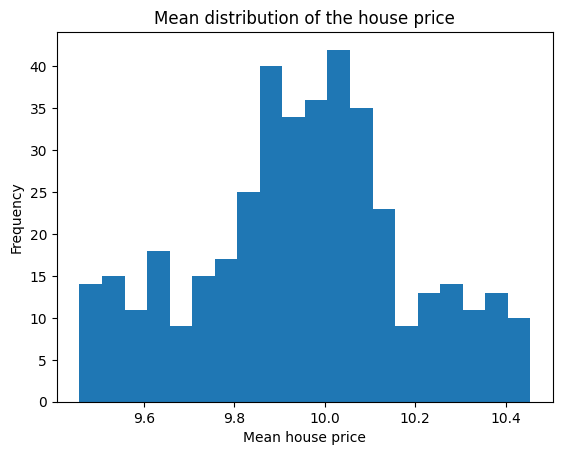

In [4]:
plt.hist(df["log_price"], bins=20)
plt.xlabel("Mean house price")
plt.ylabel("Frequency")
plt.title("Mean distribution of the house price");

## Split data

In [5]:
target = "log_price"
y = df[target]
X = df.drop(columns=target)
X.head()

,crim,indus,rm,age,rad,tax,ptratio,b,lstat
0,0.00632,2.31,6.575,65.2,1,296.0,15.3,396.90,4.98
1,0.02731,7.07,6.421,78.9,2,242.0,17.8,396.90,9.14
2,0.02729,7.07,7.185,61.1,2,242.0,17.8,392.83,4.03
3,0.03237,2.18,6.998,45.8,3,222.0,18.7,394.63,2.94
5,0.02985,2.18,6.430,58.7,3,222.0,18.7,394.12,5.21


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model

In [7]:
y_mean = y_train.mean()
y_pred_base = [y_mean] * len(y_train)
mae_base = rmse(y_train, y_pred_base)
base_err = mean_absolute_error(y_train, y_pred_base)
mae_base

np.float64(0.2361861553279867)

## Build the model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [9]:
y_pred_train = model.predict(X_train)
mae_base_train = rmse(y_train, y_pred_train)
train_err = mean_absolute_error(y_train, y_pred_train)
mae_base_train

np.float64(0.13281501038647053)

In [10]:
coefficients = model.coef_
coefficients

array([-0.00319898,  0.00040565,  0.06994297, -0.00050948,  0.01116157,
       -0.00056108, -0.02735968,  0.00056169, -0.01880066])

In [11]:
intercepts = model.intercept_
intercepts

np.float64(10.212298308790821)

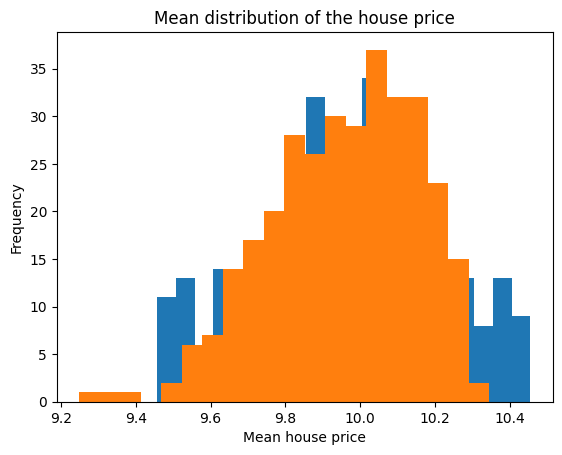

In [12]:
plt.hist(y_train, bins=20, label="actual")
plt.hist(y_pred_train, bins=20, color="C1", label="predicted")
plt.xlabel("Mean house price")
plt.ylabel("Frequency")
plt.title("Mean distribution of the house price");

In [13]:
y_pred_test = model.predict(X_test)
mae_base_test = rmse(y_test, y_pred_test)
test_err = mean_absolute_error(y_test, y_pred_test)
mae_base_test

np.float64(0.1569905133735076)

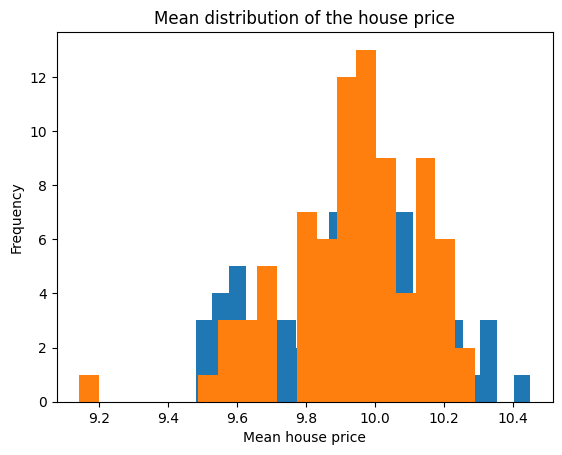

In [14]:
plt.hist(y_test, bins=20, label="actual")
plt.hist(y_pred_test, bins=20, color="C1", label="predicted")
plt.xlabel("Mean house price")
plt.ylabel("Frequency")
plt.title("Mean distribution of the house price");

In [46]:
dat = X_test[ 5:10]
dat

,crim,indus,rm,age,rad,tax,ptratio,b,lstat
81,0.04462,4.86,6.619,70.4,4,281.0,19.0,395.63,7.22
143,4.09740,19.58,5.468,100.0,5,403.0,14.7,396.90,26.42
408,7.40389,18.10,5.617,97.9,24,666.0,20.2,314.64,26.40
463,5.82115,18.10,6.513,89.9,24,666.0,20.2,393.82,10.29
313,0.26938,9.90,6.266,82.8,4,304.0,18.4,393.39,7.90


In [47]:
#Generate a single prediction
y_pred = model.predict(dat)
y_original = np.expm1(y_pred)
y_original

array([24216.75693352, 16192.4120626 , 14197.22287813, 21590.02980675,
       23262.19448878])

In [48]:
for i in range(len(dat)):
    index = dat.iloc[i].name
    print
    print(f"Index{index}: {housing.loc[index]['medv']}")

Index81: 23900.0
Index143: 15600.0
Index408: 17200.0
Index463: 20200.0
Index313: 21600.0
